<a href="https://colab.research.google.com/github/Logenleedev/HKU-Astrophysics/blob/main/HKU_Astrophysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
sns.__version__

'0.11.1'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv ('/content/drive/MyDrive/Research/Astrophysics/Potential_Candidate.csv')

In [4]:
print(df)

            Source_Name   NickName  DataRelease  ...  Prob_mpc  class_mpc  Assoc_cat
0                   NaN        NaN          NaN  ...       NaN        NaN        NaN
1     4FGL J0001.2-0747   P88Y0002          1.0  ...       0.0        NaN        NaN
2     4FGL J0002.7+7220  605P-0160          2.0  ...       0.0        NaN    snr_ext
3                   NaN        NaN          NaN  ...       NaN        NaN        NaN
4     4FGL J0004.4-4737   P88Y0021          1.0  ...       0.0        NaN        NaN
...                 ...        ...          ...  ...       ...        ...        ...
2062                NaN        NaN          NaN  ...       NaN        NaN        NaN
2063  4FGL J2357.8+6839   P88Y6488          1.0  ...       0.0        NaN        NaN
2064  4FGL J2358.0-4601   P88Y6490          1.0  ...       0.0        NaN        NaN
2065  4FGL J2359.0+3922   P88Y6498          1.0  ...       0.0        NaN        NaN
2066                NaN        NaN          NaN  ...       NaN   

In [5]:
sorted(df)

['1FGL',
 '2FGL',
 '3FGL',
 '3FHL',
 '4FGL',
 'AT20G_name',
 'Assoc_cat',
 'Conf_95_PosAng',
 'Conf_95_SemiMajor',
 'Conf_95_SemiMinor',
 'DEC_Xradio',
 'DEC_count',
 'DEC_radio',
 'DEJ2000',
 'DataRelease',
 'Energy_Flux100',
 'Energy_Flux1000',
 'Extended',
 'Flux100',
 'Flux1000',
 'Flux_X',
 'Flux_radio',
 'GLAT',
 'GLON',
 'ID_Name',
 'ID_Number',
 'ID_path',
 'LP_EPeak',
 'LP_Flux_Density',
 'LP_Index',
 'LP_TSCurv',
 'LP_beta',
 'LP_nuFnuPeak',
 'LR_X',
 'LR_radio',
 'NickName',
 'Npred',
 'Object Name',
 'PLEC_Cutoff',
 'PLEC_EPeak',
 'PLEC_Exp_Index',
 'PLEC_ExpfactorS',
 'PLEC_Flux_Density',
 'PLEC_Index',
 'PLEC_IndexS',
 'PLEC_TSCurv',
 'PL_Flux_Density',
 'PL_Index',
 'Passoc',
 'Pivot_Energy',
 'Pos_err_X',
 'Prob_mpc',
 'RAJ2000',
 'RASS_Name',
 'RA_Xradio',
 'RA_count',
 'RA_radio',
 'ROI_dist',
 'ROI_num',
 'Signif_Avg',
 'Source_Name',
 'SpectrumType',
 'TeV',
 'TeV_Name',
 'Test_Statistic',
 'Unc_Energy_Flux100',
 'Unc_Energy_Flux1000',
 'Unc_Flux100',
 'Unc_Flux1000

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)


newdf.insert(0,"class_4FGL", df["class_4FGL"])
newdf

class_4FGL  DataRelease   RAJ2000  ...  DEC_count  Unc_pos_count  Prob_mpc
0           NaN          NaN       NaN  ...        NaN            NaN       NaN
1           bll          1.0    0.3151  ...  -7.774145   1.800000e-07       0.0
2           spp          2.0    0.6786  ...  72.750000   4.500000e-04       0.0
3           NaN          NaN       NaN  ...        NaN            NaN       NaN
4          fsrq          1.0    1.1091  ... -47.605446   8.800000e-08       0.0
...         ...          ...       ...  ...        ...            ...       ...
2062        NaN          NaN       NaN  ...        NaN            NaN       NaN
2063        NaN          1.0  359.4745  ...       -inf           -inf       0.0
2064        bcu          1.0  359.5223  ... -45.921905   2.509251e-07       0.0
2065       fsrq          1.0  359.7548  ...  39.374529   1.200000e-07       0.0
2066        NaN          NaN       NaN  ...        NaN            NaN       NaN

[2067 rows x 72 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


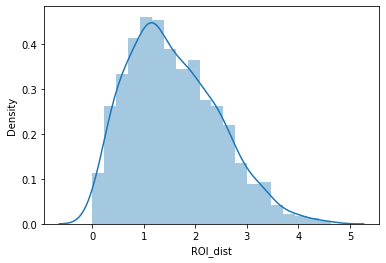

In [7]:
x = pd.Series(df["ROI_dist"], name="ROI_dist")
ax = sns.distplot(x)

In [8]:
target_df = newdf[["class_4FGL","ROI_dist","Signif_Avg", "Pivot_Energy", "Flux100", "Flux1000", "Energy_Flux100", "Energy_Flux1000", "PL_Flux_Density", "PL_Index", "LP_EPeak", "LP_Index", "PLEC_IndexS", "PLEC_TSCurv", "LP_TSCurv", "LP_beta", "PLEC_ExpfactorS", "PLEC_Exp_Index", "PLEC_Index", "PLEC_Cutoff", "reliability_LR", "Prob_mpc"]]





In [9]:
mod_df = target_df.dropna(axis=0)
mod_df = mod_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

mod_df

class_4FGL  ROI_dist  Signif_Avg  ...  PLEC_Cutoff  reliability_LR  Prob_mpc
1           bll  1.536952   23.782486  ...  32096.89500        0.932932       0.0
2           spp  1.145266    5.042615  ...   5855.70170        0.000000       0.0
4          fsrq  2.226129   19.655312  ...   8629.20300        0.973250       0.0
8           bcu  1.208738    5.437100  ...    948.33655        0.879884       0.0
11          bll  1.663325   17.222412  ...  50225.43800        0.866402       0.0
...         ...       ...         ...  ...          ...             ...       ...
2058        bcu  2.036545    7.339945  ...  15180.69600        0.000000       0.0
2059       fsrq  1.714678    3.863195  ...   7979.38960        0.919307       0.0
2061        bcu  1.390100   11.506633  ...  39552.22700        0.952286       0.0
2064        bcu  2.564420   12.299651  ...  29442.52000        0.841322       0.0
2065       fsrq  0.574843   10.998774  ...  28022.32000        0.967196       0.0

[729 rows x 22 columns]

In [ ]:
sns.pairplot(mod_df, dropna=True)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7efe9e8e24d0> (for post_execute):


KeyboardInterrupt: ignored

In [10]:
mod_df_log_transform  = mod_df.copy()

In [11]:
mod_df_log_transform['Flux1000'] = np.log(mod_df_log_transform['Flux1000'])
mod_df_log_transform['Energy_Flux100'] = np.log(mod_df_log_transform['Energy_Flux100']) 
mod_df_log_transform['Energy_Flux1000'] = np.log(mod_df_log_transform['Energy_Flux1000']) 
mod_df_log_transform['PL_Flux_Density'] = np.log(mod_df_log_transform['PL_Flux_Density']) 
mod_df_log_transform['LP_beta'] = np.log(mod_df_log_transform['LP_beta']) 

In [12]:
print(mod_df_log_transform['class_4FGL'].value_counts())

bcu      319
bll      182
fsrq     181
unk       13
rdg        8
spp        8
psr        3
css        3
sbg        3
agn        2
ssrq       1
nlsy1      1
snr        1
PSR        1
LMB        1
sfr        1
FSRQ       1
Name: class_4FGL, dtype: int64


In [15]:
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'bcu'),'class_4FGL']='bcu-bll-fsrq-agn'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'bll'),'class_4FGL']='bcu-bll-fsrq-agn'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'fsrq'),'class_4FGL']='bcu-bll-fsrq-agn'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'agn'),'class_4FGL']='bcu-bll-fsrq-agn'

In [17]:
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'FSRQ'),'class_4FGL']='fsrq'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'PSR'),'class_4FGL']='psr'

In [24]:
# drop rdg
indexNames_rdg = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'rdg'].index
mod_df_log_transform.drop(indexNames_rdg , inplace=True)
# drop unk
indexNames_unk = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'unk'].index
mod_df_log_transform.drop(indexNames_unk , inplace=True)
# drop LMB
indexNames_LMB = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'LMB'].index
mod_df_log_transform.drop(indexNames_LMB , inplace=True)

In [32]:
# drop nlsy1
indexNames_nlsy1 = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'nlsy1'].index
mod_df_log_transform.drop(indexNames_nlsy1 , inplace=True)

# drop sfr
indexNames_sfr = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'sfr'].index
mod_df_log_transform.drop(indexNames_sfr , inplace=True)

# drop ssrq
indexNames_ssrq = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'ssrq'].index
mod_df_log_transform.drop(indexNames_ssrq , inplace=True)

# snr
indexNames_snr = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'snr'].index
mod_df_log_transform.drop(indexNames_snr , inplace=True)


In [33]:

print(mod_df_log_transform['class_4FGL'].value_counts())

bcu-bll-fsrq-agn    684
spp                   8
psr                   4
css                   3
sbg                   3
fsrq                  1
Name: class_4FGL, dtype: int64


In [34]:
list(mod_df_log_transform.columns)

['class_4FGL',
 'ROI_dist',
 'Signif_Avg',
 'Pivot_Energy',
 'Flux100',
 'Flux1000',
 'Energy_Flux100',
 'Energy_Flux1000',
 'PL_Flux_Density',
 'PL_Index',
 'LP_EPeak',
 'LP_Index',
 'PLEC_IndexS',
 'PLEC_TSCurv',
 'LP_TSCurv',
 'LP_beta',
 'PLEC_ExpfactorS',
 'PLEC_Exp_Index',
 'PLEC_Index',
 'PLEC_Cutoff',
 'reliability_LR',
 'Prob_mpc']

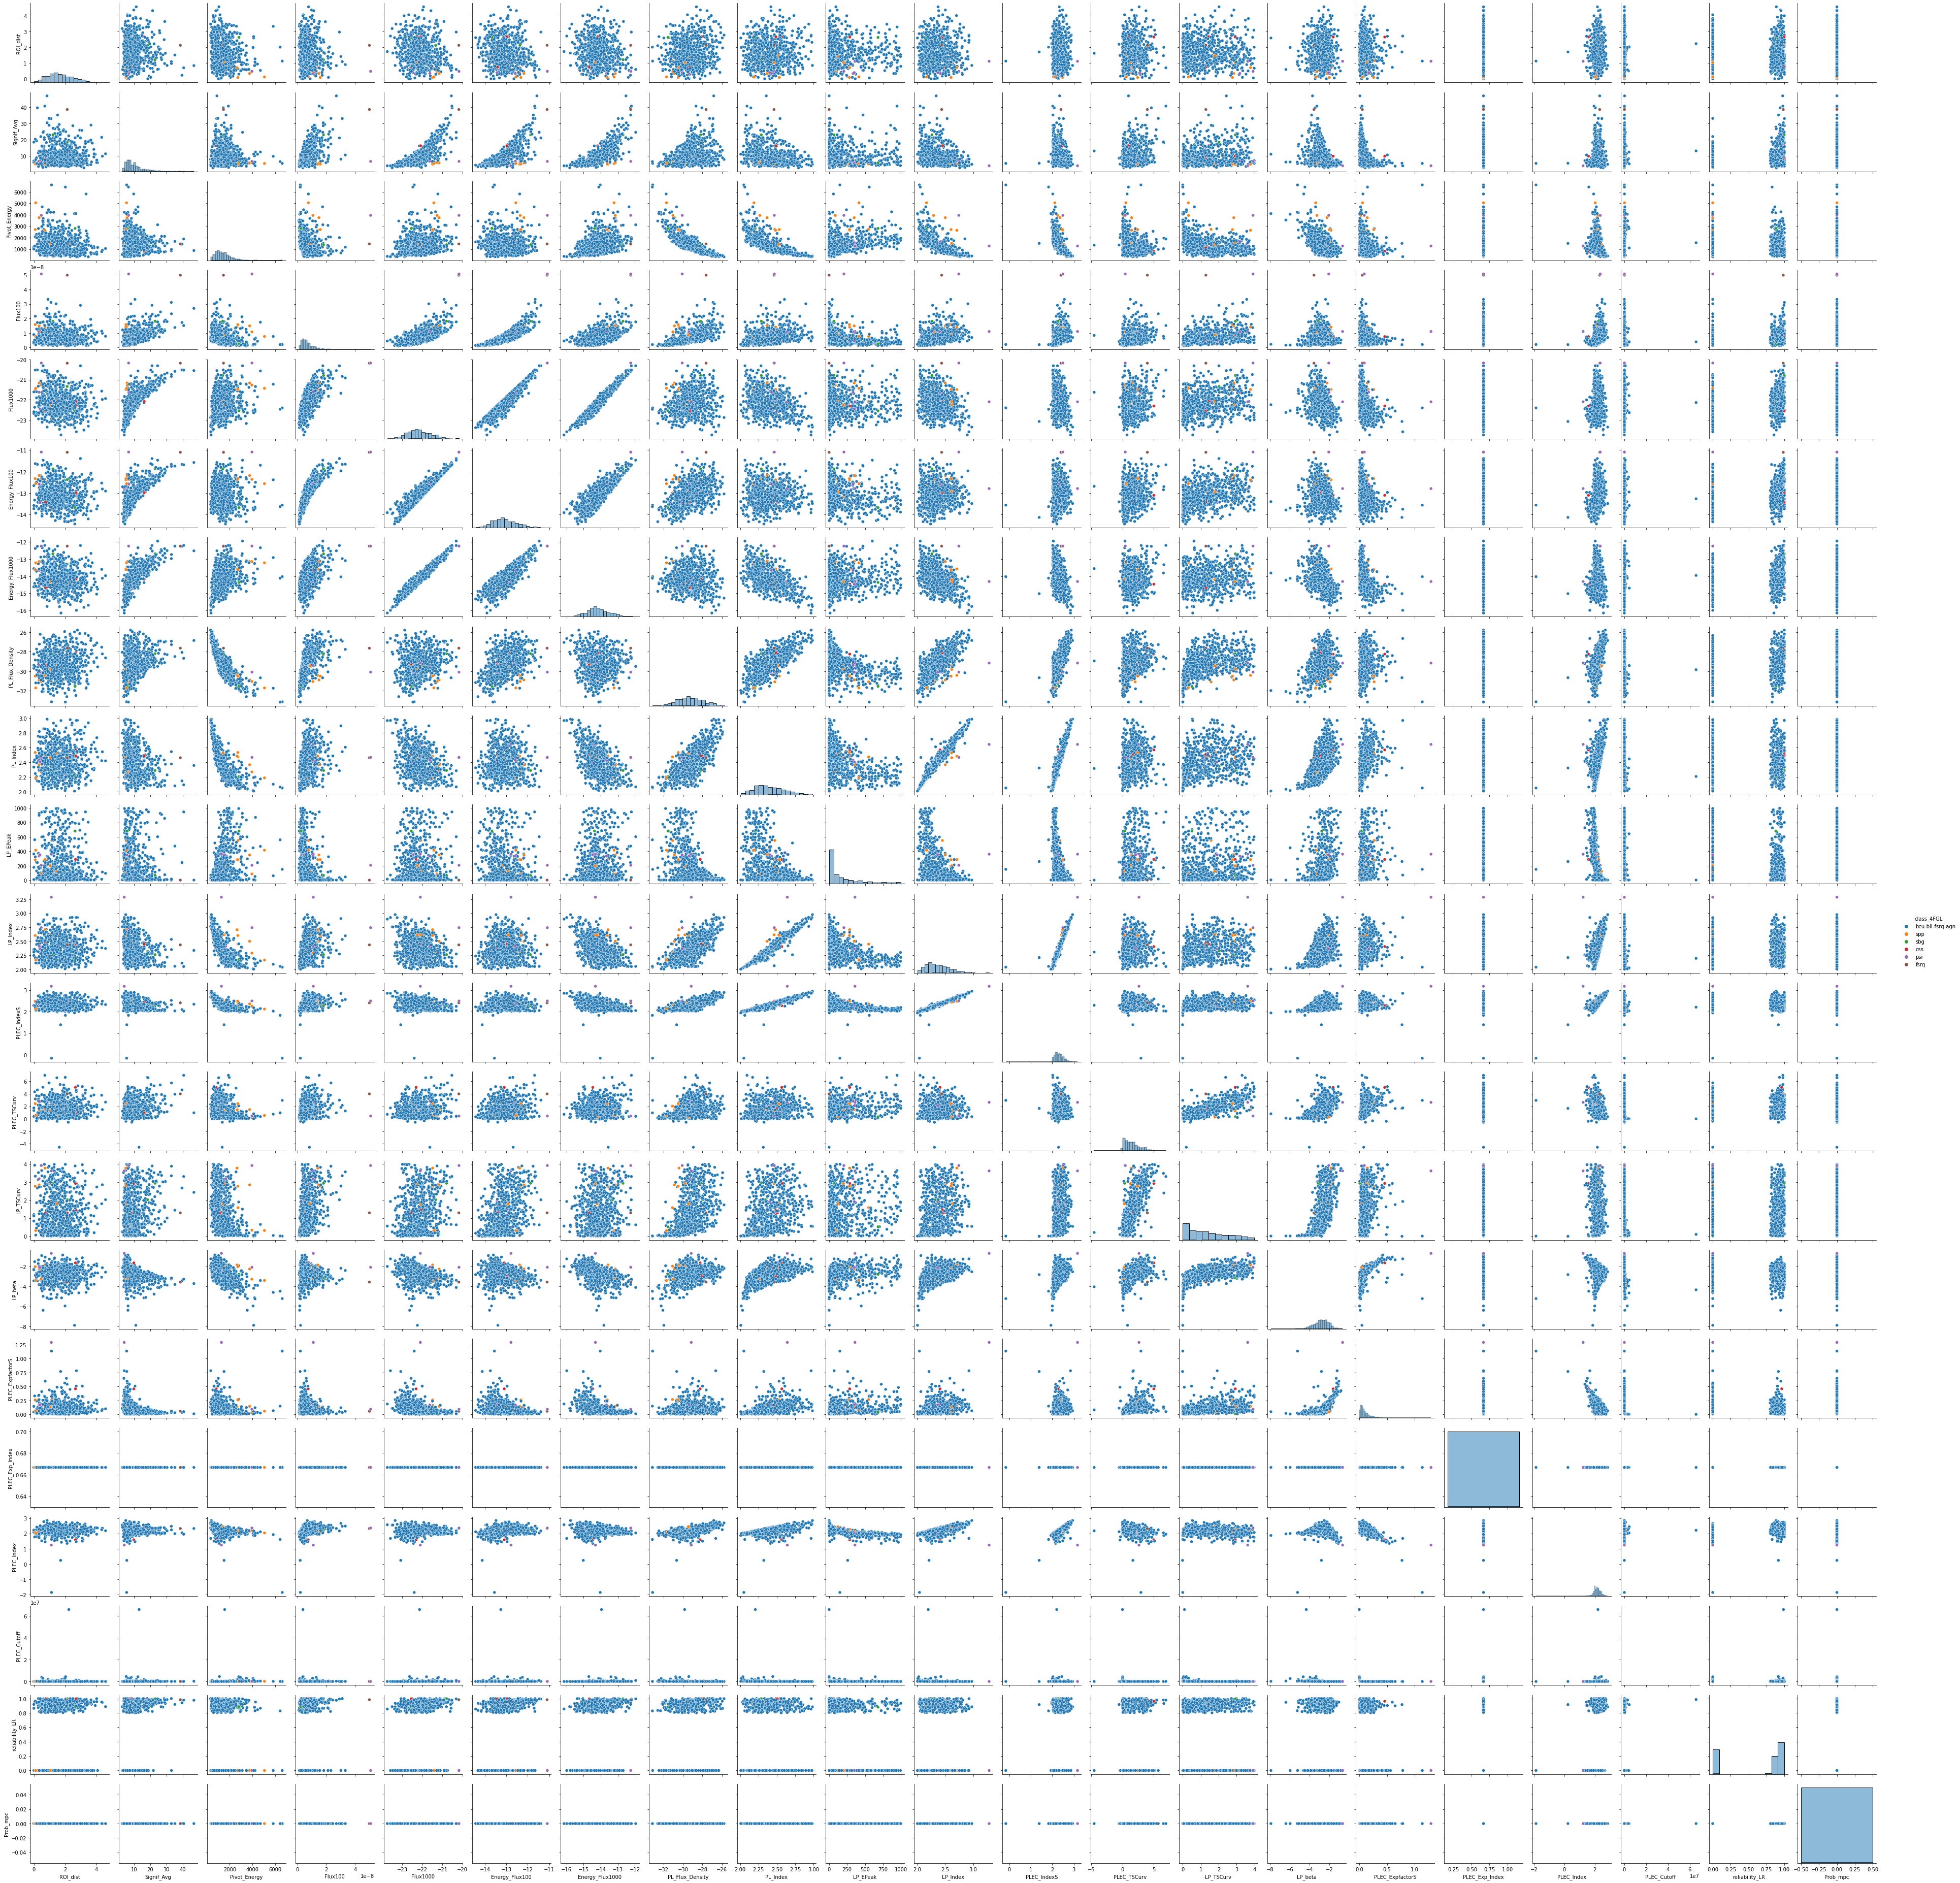

In [35]:
sns.pairplot(mod_df_log_transform, hue="class_4FGL",diag_kind='hist')

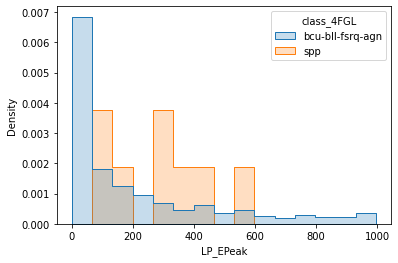

In [36]:
# Plot histogram, change the variable name to plot different columns. Check seaborn doc at: https://seaborn.pydata.org/generated/seaborn.histplot.html
target = mod_df_log_transform.loc[(mod_df_log_transform['class_4FGL'] == 'bcu-bll-fsrq-agn') | (mod_df_log_transform['class_4FGL'] == 'spp')]
sns.histplot(data=target, x="LP_EPeak", hue="class_4FGL", element="step", stat="density", common_norm=False,)

In [38]:
# Plot scatter plot, change the variable name to plot different columns.
temp = mod_df_log_transform[(mod_df_log_transform['class_4FGL'] == 'bcu-bll-fsrq-agn') | (mod_df_log_transform['class_4FGL'] == 'spp')]

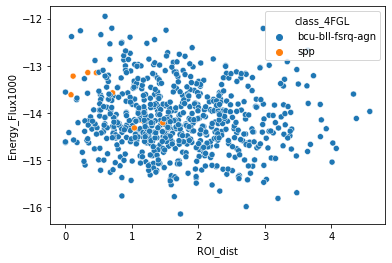

In [40]:
sns.scatterplot(data=temp, x="ROI_dist", y="Energy_Flux1000", hue="class_4FGL")

## Apply RFE algo


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [ ]:
X = mod_df_log_transform.loc[:, mod_df_log_transform.columns != 'class_4FGL']
y = mod_df_log_transform['class_4FGL']
print(X.shape, y.shape)

(729, 21) (729,)


In [ ]:
# define dataset
X, y = make_classification(n_samples=729, n_features=21, n_informative=8, n_redundant=13, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.844 (0.038)


In [ ]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 2.000
Column: 3, Selected False, Rank: 13.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 12.000
Column: 6, Selected False, Rank: 11.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 7.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 10.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 4.000
Column: 13, Selected False, Rank: 5.000
Column: 14, Selected False, Rank: 14.000
Column: 15, Selected False, Rank: 9.000
Column: 16, Selected False, Rank: 6.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected False, Rank: 3.000
Column: 20, Selected False, Rank: 8.000


In [ ]:
mod_df_log_transform.iloc[:,18]

1       1.951787
2       1.956788
4       2.209918
8       1.916517
11      2.025672
          ...   
2058    1.913858
2059    1.933865
2061    2.479163
2064    2.316768
2065    2.286646
Name: PLEC_Index, Length: 729, dtype: float64